# Análisis de Vías Rurales

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
# Cargar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from EDA_cleaning_utils import tabla_frecuencia
from EDA_cleaning_utils import graficar_barras
from EDA_cleaning_utils import normalizar_columna
import hvplot.pandas
pd.set_option('display.max_columns', None)

In [22]:
# Cargar datos 
df = pd.read_excel("vias_rurales.xlsx")
df.head()

,ITEM,LINK,AÑO DE FIRMA DEL CONTRATO,PROMOTOR,TIPO DE PROYECTO,REGION DE COLOMBIA,CONTRATISTA,TIPO DE DESVIACIÓN,AUMENTO DE CANTIDADES Y ACTIVIDADES,CLIMA,AJUSTE A DISEÑOS ORIGINALES,ESCAZES DE MATERIALES,AUMENTO EN LOS COSTOS DE LOS MATERIALES,FALTA DE HERRAMIENTAS,FALTAS DE EQUIPOS,FALTA DE MANO DE OBRA,CONFLICTOS SOCIALES,ASPECTOS TECNICOS CONSTRUCTIVOS,TOPOGRAFIA DESFAVORABLE,VALOR INICIAL DEL CONTRATO,VALOR INICIAL DEL CONTRATO ( SMMLV),PLAZO INICIAL DEL CONTRATO (MESES),VALOR FINAL DEL CONTRATO,PLAZO FINAL DEL CONTRATO,VALOR ADICION,PRORROGA (MESES),VALOR DE LICITACIÓN,PORCENTAJE DE BAJA,NUMERO DE PARTICIPANTES EN PROCESO,FECHA DE APERTURA,FECHA DE PLIEGOS DEFINITIVOS,FECHA DE CIERRE Y PARTICIPACION,FECHA DE ADJUDICACION,PLAZO TOTAL DEL PROCESO DE SELECCIÓN,PLAZO PARA LA PRESENTACION DE OFERTAS,PLAZO PARA EVALUACION DE OFERTAS,INDICE DE LIQUIDEZ,INDICE DE ENDEUDAMIENTO,RAZON DE COBERTURA DE INTERES,PATRIMONIO,CAPITAL DE TRABAJO,RENTABILIDAD DEL PATRIMONIO,RENTABILIDAD DEL ACTIVO,CAPACIDAD RESIDUAL,CAPACIDAD RESIDUAL %,EXPERIENCIA SOBRE EL PROCESO (SMMLV),NUMERO MAXIMO DE CONTRATOS,PUNTAJE DEL FACTOR ECONOMICO,PUNTAJE FACTOR TECNICO,PUNTAJE PLAN DE TRABAJO,PUNTAJE APOYO INDUSTRIA NACIONAL,TOTAL PUNTAJE OBTENIDO
0,1.0,https://www.contratos.gov.co/consultas/detalle...,2018.0,ALCALDIA,MEJORAMIENTO,REGION ANDINA,PERSONA JURIDICA,COSTO Y TIEMPO,SI,SI,SI,NO,NO,SI,SI,NO,SI,NO,SI,810612213.0,1037.594258,4.0,858924946.0,5.5,48312733,1.5,8.106869e+08,0.999908,1.0,2018-01-11,2018-02-15 00:00:00,2018-03-02 00:00:00,2018-03-21,69.0,15.0,19.0,2.0,0.50,6.0,0.0,0.000000e+00,0.04,0.00,8.106869e+08,1.0,2075.188515,4.0,600.0,100.0,100.0,100.0,900.0
1,2.0,https://www.contratos.gov.co/consultas/detalle...,2018.0,ALCALDIA,MANTENIMIENTO,REGION ANDINA,PERSONA JURIDICA,COSTO Y TIEMPO,SI,NO,SI,SI,NO,SI,SI,NO,SI,NO,SI,560000000.0,716.807340,3.0,768711000.0,3.0,208711000,1.0,5.600000e+08,1.000000,1.0,2018-05-22,2018-06-07 00:00:00,2018-08-03 00:00:00,2018-11-07,169.0,57.0,96.0,950.0,0.01,950.0,2.0,1.120000e+09,0.04,0.40,5.600000e+08,1.0,716.807340,1.0,700.0,100.0,100.0,0.0,900.0
2,3.0,https://www.contratos.gov.co/consultas/detalle...,2018.0,ALCALDIA,REHABILITACION,REGION CARIBE,PERSONA NATURAL,TIEMPO,NO,SI,NO,SI,SI,NO,NO,NO,NO,NO,SI,793868990.0,1016.162713,2.0,793868990.0,2.0,$ -,2.0,7.940146e+08,0.999817,1.0,2018-03-21,2018-03-21 00:00:00,2018-04-04 00:00:00,2018-04-07,17.0,14.0,3.0,1.0,0.70,3.0,0.4,7.940146e+08,0.04,0.02,7.940146e+08,1.0,1524.244069,1.0,700.0,100.0,90.0,100.0,990.0
3,4.0,https://www.contratos.gov.co/consultas/detalle...,2015.0,ALCALDIA,REHABILITACION,REGION ANDINA,CONSORCIO,COSTO Y TIEMPO,SI,NO,SI,NO,NO,NO,SI,NO,SI,NO,NO,439841404.0,682.612561,2.0,449823702.0,2.0,9982298,1.5,4.499316e+08,0.977574,5.0,2015-10-01,2015-10-01 00:00:00,2015-10-13 00:00:00,2015-12-14,74.0,12.0,62.0,1.2,0.70,1.0,0.5,4.398414e+08,0.03,0.01,4.049384e+08,0.9,1023.918842,1.0,700.0,100.0,100.0,100.0,1000.0
4,5.0,https://www.contratos.gov.co/consultas/detalle...,2017.0,ALCALDIA,MEJORAMIENTO,REGION ANDINA,UNION TEMPORAL,COSTO Y TIEMPO,SI,SI,SI,NO,NO,NO,NO,NO,NO,NO,SI,644292710.0,873.360259,4.0,850487311.0,8.0,206194601,4.0,6.449974e+08,0.998907,1.0,2017-08-08,2017-08-08 00:00:00,2017-08-14 00:00:00,2017-08-25,17.0,6.0,11.0,10.0,0.70,5.0,0.5,6.449974e+08,0.25,0.12,6.449974e+08,1.0,1310.040388,1.0,700.0,100.0,100.0,100.0,1000.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 52 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   ITEM                                      239 non-null    float64       
 1   LINK                                      239 non-null    object        
 2   AÑO DE FIRMA DEL CONTRATO                 239 non-null    float64       
 3   PROMOTOR                                  239 non-null    object        
 4   TIPO DE PROYECTO                          239 non-null    object        
 5   REGION DE COLOMBIA                        237 non-null    object        
 6   CONTRATISTA                               239 non-null    object        
 7   TIPO DE DESVIACIÓN                        239 non-null    object        
 8   AUMENTO DE CANTIDADES Y ACTIVIDADES       243 non-null    object        
 9   CLIMA                           

## Limpieza de datos

### Normalizar nombre de columnas

In [24]:
# Eliminar espacios en blanco al inicio y final del nombre de las columnas
df.columns = df.columns.str.strip()

In [25]:
# Identificar las columnas que son causas:
columnas_causas = ['AUMENTO DE CANTIDADES Y ACTIVIDADES', 'CLIMA',
                     'AJUSTE A DISEÑOS ORIGINALES', 'ESCAZES DE MATERIALES',
                     'AUMENTO EN LOS COSTOS DE LOS MATERIALES', 'FALTA DE HERRAMIENTAS',
                     'FALTAS DE EQUIPOS', 'FALTA DE MANO DE OBRA', 'CONFLICTOS SOCIALES',
                     'ASPECTOS TECNICOS CONSTRUCTIVOS', 'TOPOGRAFIA DESFAVORABLE']
df.columns = ['CAUSA: ' + i if i in columnas_causas else i for i in df.columns]

### Normalizar columnas categóricas

In [26]:
# Normalizar la columna 'TIPO DE PROYECTO'
reemplazos = {
    'CONSTRUCCION': 'CONSTRUCCIÓN',
    'CONSTRUCION': 'CONSTRUCCIÓN',
    'CONSTRUCIOCCION': 'CONSTRUCCIÓN',
    'CONSTRUCCON': 'CONSTRUCCIÓN',
    'REHABILITACION': 'REHABILITACIÓN'
}
# Verificar los valores únicos en la variable
df['TIPO DE PROYECTO'] = normalizar_columna(df, 'TIPO DE PROYECTO', reemplazos)

Antes de la estandarización la columna tiene los siguientes valores únicos:
['MEJORAMIENTO ' 'MANTENIMIENTO ' 'REHABILITACION' 'REHABILITACION '
 'CONSTRUCCION ' 'OTROS ' 'MANTENIMIENTO' 'MEJORAMIENTO' 'REHABILITACIÓN'
 'CONSTRUCCIÓN' 'CONSTRUCIÓN' 'CONSTRUCION ' 'CONSTRUCCÓN'
 'CONSTRUCIOCCION' nan]
--------------------------------------------------------------------------------
Después de la estandarización los valores únicos son:
['MEJORAMIENTO' 'MANTENIMIENTO' 'REHABILITACIÓN' 'CONSTRUCCIÓN' 'OTROS'
 nan]


In [27]:
# Normalizar la columna 'PROMOTOR'
reemplazos = {
     'GOBERNACION':'GOBERNACIÓN',
     'DPTO': 'GOBERNACIÓN',
     'GOBERNACION CALDAS': 'GOBERNACIÓN'
}
df['PROMOTOR'] = normalizar_columna(df, 'PROMOTOR', reemplazos)

Antes de la estandarización la columna tiene los siguientes valores únicos:
['ALCALDIA ' 'OTROS' 'GOBERNACION' 'GOBERNACIÓN CALDAS' 'DPTO' nan]
--------------------------------------------------------------------------------
Después de la estandarización los valores únicos son:
['ALCALDIA' 'OTROS' 'GOBERNACIÓN' nan]


In [28]:
# Normalizar la columna 'CONTRATISTA'
reemplazos = {
    'PERSONA JURIDICA' : 'JURÍDICA', 
    'PERSONA NATURAL': 'NATURAL', 
    'PERSONA JURIDICO': 'JURÍDICA', 
    'JURIDICA': 'JURÍDICA', 
}
df['CONTRATISTA'] = pd.Series(normalizar_columna(df, 'CONTRATISTA', reemplazos))

Antes de la estandarización la columna tiene los siguientes valores únicos:
['PERSONA JURIDICA' 'PERSONA NATURAL ' 'CONSORCIO ' 'UNION TEMPORAL'
 'PERSONA NATURAL' 'CONSORCIO' 'PERSONA JURIDICO' 'JURIDICA' 'NATURAL' nan]
--------------------------------------------------------------------------------
Después de la estandarización los valores únicos son:
['JURÍDICA' 'NATURAL' 'CONSORCIO' 'UNION TEMPORAL' nan]


In [29]:
# Normalizar la columna 'TIPO DE DESVIACIÓN'
reemplazar = {} 
df['TIPO DE DESVIACIÓN'] = normalizar_columna(df, 'TIPO DE DESVIACIÓN', reemplazar)

Antes de la estandarización la columna tiene los siguientes valores únicos:
['COSTO Y TIEMPO' 'TIEMPO' 'SIN DESV' 'TIEMPO ' 'COSTO' nan]
--------------------------------------------------------------------------------
Después de la estandarización los valores únicos son:
['COSTO Y TIEMPO' 'TIEMPO' 'SIN DESV' 'COSTO' nan]


### Valores faltantes

In [30]:
# Datos faltantes por columna
df.isna().sum()

ITEM                                              6
LINK                                              6
AÑO DE FIRMA DEL CONTRATO                         6
PROMOTOR                                          6
TIPO DE PROYECTO                                  6
REGION DE COLOMBIA                                8
CONTRATISTA                                       6
TIPO DE DESVIACIÓN                                6
CAUSA: AUMENTO DE CANTIDADES Y ACTIVIDADES        2
CAUSA: CLIMA                                      2
CAUSA: AJUSTE A DISEÑOS ORIGINALES                2
CAUSA: ESCAZES DE MATERIALES                      2
CAUSA: AUMENTO EN LOS COSTOS DE LOS MATERIALES    2
CAUSA: FALTA DE HERRAMIENTAS                      2
CAUSA: FALTAS DE EQUIPOS                          2
CAUSA: FALTA DE MANO DE OBRA                      2
CAUSA: CONFLICTOS SOCIALES                        2
CAUSA: ASPECTOS TECNICOS CONSTRUCTIVOS            2
CAUSA: TOPOGRAFIA DESFAVORABLE                    2
VALOR INICIA

In [31]:
# Valores faltantes en la columna link
df[df['LINK'].isna()]

,ITEM,LINK,AÑO DE FIRMA DEL CONTRATO,PROMOTOR,TIPO DE PROYECTO,REGION DE COLOMBIA,CONTRATISTA,TIPO DE DESVIACIÓN,CAUSA: AUMENTO DE CANTIDADES Y ACTIVIDADES,CAUSA: CLIMA,CAUSA: AJUSTE A DISEÑOS ORIGINALES,CAUSA: ESCAZES DE MATERIALES,CAUSA: AUMENTO EN LOS COSTOS DE LOS MATERIALES,CAUSA: FALTA DE HERRAMIENTAS,CAUSA: FALTAS DE EQUIPOS,CAUSA: FALTA DE MANO DE OBRA,CAUSA: CONFLICTOS SOCIALES,CAUSA: ASPECTOS TECNICOS CONSTRUCTIVOS,CAUSA: TOPOGRAFIA DESFAVORABLE,VALOR INICIAL DEL CONTRATO,VALOR INICIAL DEL CONTRATO ( SMMLV),PLAZO INICIAL DEL CONTRATO (MESES),VALOR FINAL DEL CONTRATO,PLAZO FINAL DEL CONTRATO,VALOR ADICION,PRORROGA (MESES),VALOR DE LICITACIÓN,PORCENTAJE DE BAJA,NUMERO DE PARTICIPANTES EN PROCESO,FECHA DE APERTURA,FECHA DE PLIEGOS DEFINITIVOS,FECHA DE CIERRE Y PARTICIPACION,FECHA DE ADJUDICACION,PLAZO TOTAL DEL PROCESO DE SELECCIÓN,PLAZO PARA LA PRESENTACION DE OFERTAS,PLAZO PARA EVALUACION DE OFERTAS,INDICE DE LIQUIDEZ,INDICE DE ENDEUDAMIENTO,RAZON DE COBERTURA DE INTERES,PATRIMONIO,CAPITAL DE TRABAJO,RENTABILIDAD DEL PATRIMONIO,RENTABILIDAD DEL ACTIVO,CAPACIDAD RESIDUAL,CAPACIDAD RESIDUAL %,EXPERIENCIA SOBRE EL PROCESO (SMMLV),NUMERO MAXIMO DE CONTRATOS,PUNTAJE DEL FACTOR ECONOMICO,PUNTAJE FACTOR TECNICO,PUNTAJE PLAN DE TRABAJO,PUNTAJE APOYO INDUSTRIA NACIONAL,TOTAL PUNTAJE OBTENIDO
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,66,50,39,6,4,5,1,9,5,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,150,167,172,203,209,206,238,204,205,149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214,216,217,211,209,213,211,239,213,210,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.299065,0.305556,0.230415,0.184834,0.028708,0.018779,0.023697,0.004184,0.042254,0.02381,0.303738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Eliminar filas con valores faltantes en la columna Link
df = df.dropna(subset=['LINK'])

### Normalizar columnas numéricas

In [33]:
# Normalizar la columna 'AÑO DE FIRMA DEL CONTRATO'
df['AÑO DE FIRMA DEL CONTRATO'] = df['AÑO DE FIRMA DEL CONTRATO'].astype('int64')

In [34]:
# Verificar la columna VALOR ADICION
df['VALOR ADICION'].unique()

array([48312733, 208711000, '$ -   ', 9982298, 206194601, 2000000000,
       15000000, 225677223, 26520972, 106170240, 306064110, 106000000,
       134731300, 34307397, 35863618, 18975061, 25998853, 130146554,
       38836596, 85997498, 36933406, 170009818, 26500000, 132609421,
       350454234, 20873573, 11568007, 571543750, 38366055, 4312444059,
       550000000, 2749999939, 44271346, 51149999, 8027408, 147576452,
       144178927, 299914520, 200000000, 16270450, 79995923, 400000000,
       51051221, 5401357139, 625228375, 811341737, 37358249, 139410960,
       3549985831, 73874536, 36595372, 673022995, 34417793, 972680004,
       19279242, 600000000, 78844606, 998197834, 299996691, 9503703,
       1741778071, 15687324, 84996195, 556907266, 9747895, 300554048,
       6971817467, 239991164, 148074757, 94668743], dtype=object)

In [35]:
# Normalizar la columna VALOR ADICION

# Convertir la columna a numérico, usando 'coerce' para manejar valores no numéricos como NaN
df['VALOR ADICION'] = pd.to_numeric(df['VALOR ADICION'], errors='coerce')

# Reemplazar NaN con 0
df['VALOR ADICION'].fillna(0, inplace=True)

In [36]:
df.to_excel("vias_rurales_limpia.xlsx", index=False)

## Análisis exploratorio de datos

**Recomendaciones y observaciones**:
- Considerar tanto proyectos liquidados como no liquidados. Esto nos daría una mejor perspectiva del comportamiento de los contrato. 
- ¿Tenemos proyectos suspendidos?
- Con la base de datos de adiciones, tratar ver que tan rápido se solicita la adición en costo.
- Con la base de datos de modificaciones, tratar de mirar en qué momento se realizan modificaciones y que tipo de modificaciones se realizan.
- Sería buenos incluir contratos con diferentes modalidades de cotratación.
- Para los objetivos del proyectos recomendaría considerar algunas variables adicionales sobre los procesos y mecanimos que se utilizan en las licitaciones. Por ejemplo, he observado que algunos contratos de obra pueden estar dentro de un proceso de licitación donde contratan múltiples obras, o se divide el proyecto en módulos como es el caso del ítem 208.
- Como variable a predecir se pueden considerar las siguientes opciones:
    - Variable binaria que indique si el proyecto tiene o no desviaciones en tiempo o costo
    - Precio relativo [(Abdou, A., Basdevant, O., David-Barrett, E., & Fazekas, M., 2022)](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4147325): $$\text{Precio Relativo} = \frac{\text{Valor Final con Adiciones}}{\text{Valor Inicial}}$$


### Contratos por año

**Análisis y observaciones:**
- Si bien en la gráfica se observa una tendencia decreciente en el número de contrato, esto puede obedecer a que solo se consideran los contratos liquitados. Sería interesante incluir todos los contratos: liquidados, suspendidos, sancionados y en curso. Esto nos daría una mejor perspesctiva sobre el comportamiento de la contratación de vías rurales. 
- ¿Porque no se incluyen contratos del 2014? Nos ayudaría a tener una base comparativa para mirar el efecto del proceso de paz.

In [37]:
# Contratos por año
contratos_anno = tabla_frecuencia(df, column_name='AÑO DE FIRMA DEL CONTRATO', total_name='TOTAL CONTRATOS', percentage_name='PORCENTAJE', ordenar=False)
contratos_anno

,AÑO DE FIRMA DEL CONTRATO,TOTAL CONTRATOS,PORCENTAJE
0,2015,70,29.29
1,2016,37,15.48
2,2017,58,24.27
3,2018,47,19.67
4,2019,25,10.46
5,2020,2,0.84


In [40]:
contratos_anno.hvplot.bar(x='AÑO DE FIRMA DEL CONTRATO', 
                           y='TOTAL CONTRATOS', 
                           title='Contratos por año')

:Bars   [AÑO DE FIRMA DEL CONTRATO]   (TOTAL CONTRATOS)

### Tipo de proyecto

In [79]:
# Total y porcentaje de contratos por tipo de proyecto
contratos_tipo_proyecto = tabla_frecuencia(df, column_name='TIPO DE PROYECTO', total_name='TOTAL CONTRATOS', percentage_name='PORCENTAJE', ordenar=True)
contratos_tipo_proyecto

,TIPO DE PROYECTO,TOTAL CONTRATOS,PORCENTAJE
0,CONSTRUCCIÓN,108,45.19
2,MEJORAMIENTO,78,32.64
1,MANTENIMIENTO,29,12.13
4,REHABILITACIÓN,17,7.11
3,OTROS,7,2.93


### Promotor

In [80]:
# Total y porcentaje de contratos por promotor
contratos_promotor = tabla_frecuencia(df, column_name='PROMOTOR')
contratos_promotor

,PROMOTOR,TOTAL CONTRATOS,PORCENTAJE
0,ALCALDIA,226,94.56
1,GOBERNACIÓN,10,4.18
2,OTROS,3,1.26


### Región

**Observaciones:**
- Revisar la normalización de esta variable ¿Región? ¿Departamento?

In [81]:
df['REGION DE COLOMBIA'].unique()

array(['REGION ANDINA ', 'REGION CARIBE', 'REGION CARIBE ',
       'REGION AMAZONICA', 'REGION ORINOQUIA ', nan, 'BOYACA', 'CUNDI',
       'CORDOBA', 'META', 'SANTANDER', 'ANTIOQUIA', 'HUILA', 'GUAVIARE',
       'CASANARE', 'NARIÑO', 'N.S', 'SORA', 'SUVRE', 'TOLIMA', 'PASCA',
       'RISARALDA', 'CALDAS', 'CUNDINAMARCA', 'SANTANER', 'CAUCA', 'CUND',
       'VALLE DEL CAUCA', 'NORTE SANTANDER', 'ARAUCA', 'PUTUMAYO',
       'CAQUETÁ', 'GUAJIRA', 'CESAR'], dtype=object)

***
### Tipo de Contratista

In [82]:
# Total contratos por tipo de contratista
contratos_tipo_contratista = tabla_frecuencia(df, column_name='CONTRATISTA')
contratos_tipo_contratista

,CONTRATISTA,TOTAL CONTRATOS,PORCENTAJE
1,JURÍDICA,159,66.53
2,NATURAL,58,24.27
0,CONSORCIO,17,7.11
3,UNION TEMPORAL,5,2.09


***
### Valores del contrato

**Análisis y observaciones:**
- Se sugiere crear rangos para el valor del contratos
- Sin son contratos que se hacen bajo licitación, tiene sentido considerar contratos por debajo de 100 millones. Solo hay dos contratos por debajo de este valor ¿Hay un error en el valor del contrato?
- El ITEM 119 (https://www.contratos.gov.co/consultas/detalleProceso.do?numConstancia=17-1-184853) tiene errores en la cuantía del contrato. El Valor real:
    - Valor de la Licitación: $\$329.073.927,11$
    - Valor Inicial del Contrato: $\$329.000.657,00$
 
- El ITEM 208 (https://www.contratos.gov.co/consultas/detalleProceso.do?numConstancia=17-1-169835) pertenece a un proceso de múltiples contratos. Este Ítem es el contrato 30062017-0435 (MODULO No 18 Vereda La Esperanza). El valor inicial del contrato esta bien, pero el valor de la licitación no. En este caso es: $\$ 42.989.533,00$. También se debe revisar el número de proponentes el archivo indica que son 3.0, pero el informe de evaluación es 12.
- El ITEM 222 es un proceso de selección de mínima cuantía, aunque aparece registrado como licitación pública. Las fechas del proceso que aparecen en excel no son correctas. Además, se presentó un solo proponente.

In [115]:
df[df['VALOR DE LICITACIÓN'] < 1.6e8]

,ITEM,LINK,AÑO DE FIRMA DEL CONTRATO,PROMOTOR,TIPO DE PROYECTO,REGION DE COLOMBIA,CONTRATISTA,TIPO DE DESVIACIÓN,CAUSA: AUMENTO DE CANTIDADES Y ACTIVIDADES,CAUSA: CLIMA,CAUSA: AJUSTE A DISEÑOS ORIGINALES,CAUSA: ESCAZES DE MATERIALES,CAUSA: AUMENTO EN LOS COSTOS DE LOS MATERIALES,CAUSA: FALTA DE HERRAMIENTAS,CAUSA: FALTAS DE EQUIPOS,CAUSA: FALTA DE MANO DE OBRA,CAUSA: CONFLICTOS SOCIALES,CAUSA: ASPECTOS TECNICOS CONSTRUCTIVOS,CAUSA: TOPOGRAFIA DESFAVORABLE,VALOR INICIAL DEL CONTRATO,VALOR INICIAL DEL CONTRATO ( SMMLV),PLAZO INICIAL DEL CONTRATO (MESES),VALOR FINAL DEL CONTRATO,PLAZO FINAL DEL CONTRATO,VALOR ADICION,PRORROGA (MESES),VALOR DE LICITACIÓN,PORCENTAJE DE BAJA,NUMERO DE PARTICIPANTES EN PROCESO,FECHA DE APERTURA,FECHA DE PLIEGOS DEFINITIVOS,FECHA DE CIERRE Y PARTICIPACION,FECHA DE ADJUDICACION,PLAZO TOTAL DEL PROCESO DE SELECCIÓN,PLAZO PARA LA PRESENTACION DE OFERTAS,PLAZO PARA EVALUACION DE OFERTAS,INDICE DE LIQUIDEZ,INDICE DE ENDEUDAMIENTO,RAZON DE COBERTURA DE INTERES,PATRIMONIO,CAPITAL DE TRABAJO,RENTABILIDAD DEL PATRIMONIO,RENTABILIDAD DEL ACTIVO,CAPACIDAD RESIDUAL,CAPACIDAD RESIDUAL %,EXPERIENCIA SOBRE EL PROCESO (SMMLV),NUMERO MAXIMO DE CONTRATOS,PUNTAJE DEL FACTOR ECONOMICO,PUNTAJE FACTOR TECNICO,PUNTAJE PLAN DE TRABAJO,PUNTAJE APOYO INDUSTRIA NACIONAL,TOTAL PUNTAJE OBTENIDO,DESVIACION EN COSTO,RANGO VALOR INICIAL DEL CONTRATO,REDUCE VALOR DE LICITACION
118,119.0,https://www.contratos.gov.co/consultas/detalle...,2018,ALCALDIA,CONSTRUCCIÓN,SANTANDER,JURÍDICA,COSTO,SI,SI,SI,SI,NO,NO,NO,NO,NO,NO,SI,32900657.0,42.113272,3.0,40928065.0,3.0,8027408.0,0.0,32900657.0,1.0,5.0,2018-01-11,2018-01-15 00:00:00,2018-01-19 00:00:00,2018-02-07,27.0,4.0,19.0,20.0,4.00,8.0,0.0,23030459.9,0.1305,0.11,32900657.0,1.0,63.169908,1.0,300.0,500.0,100.0,100.0,1000.0,True,0 - 500M,False
123,124.0,https://www.contratos.gov.co/consultas/detalle...,2017,ALCALDIA,MEJORAMIENTO,CALDAS,JURÍDICA,SIN DESV,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,132075843.0,179.033211,2.0,132075843.0,2.0,0.0,0.0,132075843.0,1.0,7.0,2017-03-21,2017-03-31 00:00:00,2017-04-06 00:00:00,2017-05-09,49.0,6.0,33.0,4.0,6.00,6.0,100.0,105660674.4,0.0700,0.07,132075843.0,1.0,268.549816,3.0,500.0,200.0,100.0,200.0,1000.0,False,0 - 500M,False
142,143.0,https://www.contratos.gov.co/consultas/detalle...,2019,ALCALDIA,MEJORAMIENTO,CALDAS,JURÍDICA,SIN DESV,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,121244356.0,146.409870,2.0,121244356.0,2.0,0.0,0.0,121244356.0,1.0,23.0,2017-03-21,2017-03-31 00:00:00,2017-04-06 00:00:00,2017-05-09,49.0,6.0,33.0,2.0,0.09,15.0,100.0,84871049.2,0.1900,0.10,242488712.0,2.0,219.614805,2.0,500.0,200.0,200.0,50.0,950.0,False,0 - 500M,False
207,208.0,https://www.contratos.gov.co/consultas/detalle...,2017,ALCALDIA,CONSTRUCCIÓN,ANTIOQUIA,JURÍDICA,SIN DESV,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,42653678.0,57.818483,2.0,42653678.0,2.0,0.0,0.0,42653678.0,1.0,3.0,2015-07-24,2015-08-11 00:00:00,2015-08-19 00:00:00,2015-09-01,39.0,8.0,13.0,2.0,0.09,15.0,100.0,29857574.6,0.1900,0.10,85307356.0,2.0,86.727725,2.0,500.0,200.0,200.0,50.0,950.0,False,0 - 500M,False
221,222.0,https://www.contratos.gov.co/consultas/detalle...,2018,ALCALDIA,MEJORAMIENTO,ANTIOQUIA,NATURAL,SIN DESV,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,150500000.0,192.641973,10.0,150500000.0,10.0,0.0,0.0,150500000.0,1.0,2.0,2015-08-06,2015-08-24 00:00:00,2015-09-07 00:00:00,2015-09-20,45.0,14.0,13.0,3.0,8.00,10.0,80.0,105350000.0,0.0400,0.03,225750000.0,1.5,288.962959,1.0,400.0,200.0,200.0,100.0,900.0,False,0 - 500M,False


In [107]:
# Resumen estadístico para los valores del contrato en millones de pesos
(df[['VALOR DE LICITACIÓN','VALOR INICIAL DEL CONTRATO','VALOR FINAL DEL CONTRATO']]/1e6).describe()

,VALOR DE LICITACIÓN,VALOR INICIAL DEL CONTRATO,VALOR FINAL DEL CONTRATO
count,239.000000,239.000000,239.000000
mean,1020.654378,1020.098431,1182.870592
std,1717.403032,1716.524285,2313.500022
min,32.900657,32.900657,40.928065
25%,299.955661,299.955661,316.210769
50%,479.548697,479.267442,500.000000
75%,888.172693,888.172693,930.043234
max,13971.578090,13971.578090,20943.395557


In [64]:
hist_val_licitacion = (df['VALOR DE LICITACIÓN']/1e6).hvplot.hist(title = 'Valor de la licitación', width=300, xlim=(0,14000))
hist_val_inicial = (df['VALOR INICIAL DEL CONTRATO']/1e6).hvplot.hist(title = 'Valor inicial', width=300)
hist_val_final = (df['VALOR INICIAL DEL CONTRATO']/1e6).hvplot.hist(title = 'Valor final', width=300)
hist_val_licitacion + hist_val_inicial + hist_val_final

:Layout
   .Histogram.I   :Histogram   [VALOR DE LICITACIÓN]   (VALOR DE LICITACIÓN_count)
   .Histogram.II  :Histogram   [VALOR INICIAL DEL CONTRATO]   (VALOR INICIAL DEL CONTRATO_count)
   .Histogram.III :Histogram   [VALOR INICIAL DEL CONTRATO]   (VALOR INICIAL DEL CONTRATO_count)

In [117]:
# Convertir el valor inicial del contrato en rangos
df['RANGO VALOR INICIAL DEL CONTRATO'] = pd.cut(df['VALOR INICIAL DEL CONTRATO'], bins=[0,5e8, 1e9, 5e9, np.infty], labels=['0 - 500M','500M - 1.000M', '1.000M - 5.000M', '> 5.000M'])

In [122]:
# Resumen estadístico del número de contratos por rango de valor
contratos_rango_valor = tabla_frecuencia(df, 'RANGO VALOR INICIAL DEL CONTRATO', ordenar=False)
contratos_rango_valor

,RANGO VALOR INICIAL DEL CONTRATO,TOTAL CONTRATOS,PORCENTAJE
0,0 - 500M,127,53.14
1,500M - 1.000M,59,24.69
2,1.000M - 5.000M,45,18.83
3,> 5.000M,8,3.35


### Valor del contrato vs valor de la licitación

In [200]:
# Porcentaje de baja en la licitación
(df['VALOR INICIAL DEL CONTRATO']/df['VALOR DE LICITACIÓN']).describe()

count    239.000000
mean       0.999585
std        0.002725
min        0.973224
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
dtype: float64

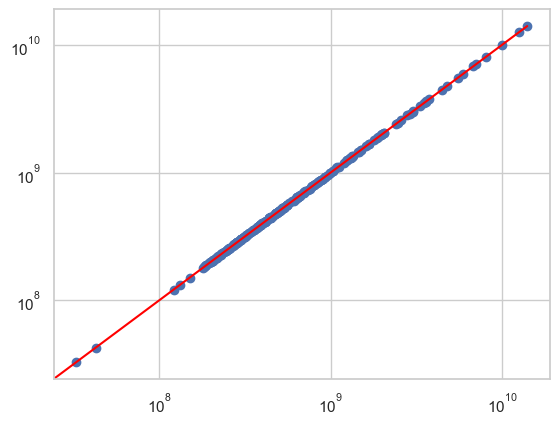

In [212]:
plt.scatter(df['VALOR DE LICITACIÓN'], df['VALOR INICIAL DEL CONTRATO'])
plt.plot([0,1.4e10],[0,1.4e10], color='red')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [199]:
# Crea una variable que indica si se se reduce el valor inicial de la licitación
df['REDUCE VALOR DE LICITACION'] = df['VALOR INICIAL DEL CONTRATO'] < df['VALOR DE LICITACIÓN']

## Análisis de las desviaciones

(maria consuelo busqueda de bibliográfia)

Analizar las desviaciones en función de las siguientes variables:
- Rango Valor
- Rango Duración
- Tipo de municipio
- Project intensity
- Región
- Award Growth
- Modalidad de contratación
- Año de firma

Otras variables:
- Origen de recursos
- Pilar acuerdo de paz
- Cambio de gobierno
- Covid
- Acuerdo de paz
- Partidos politicos que dominan los departamentos

In [102]:
# Resumen estadístico para el tipo de desviación
contratos_tipo_desviacion = tabla_frecuencia(df, column_name='TIPO DE DESVIACIÓN')
contratos_tipo_desviacion

,TIPO DE DESVIACIÓN,TOTAL CONTRATOS,PORCENTAJE
2,SIN DESV,154,64.44
0,COSTO,43,17.99
1,COSTO Y TIEMPO,27,11.30
3,TIEMPO,15,6.28


### Análisis de desviaciones en costo

In [83]:
# Resumen estadístico para la desviación en costo
(df['VALOR ADICION']/1e6).describe()

count     239.000000
mean      162.772161
std       719.372470
min         0.000000
25%         0.000000
50%         0.000000
75%        20.076408
max      6971.817467
Name: VALOR ADICION, dtype: float64

#### Porcentaje de contratos con desviación en costo

In [84]:
# Porcentaje de contratos de vías rurales con desviación en costo desviación en costo
df['DESVIACION EN COSTO'] = df['VALOR ADICION'] > 0
df['DESVIACION EN COSTO'].mean()

0.2928870292887029

In [232]:
# Resumen estadístico para el porcentaje de contratos con desviación en tiempo y costo
# Asumiendo que df es tu DataFrame
cat_cols = ['PROMOTOR', 'TIPO DE PROYECTO', 'CONTRATISTA', 'REDUCE VALOR DE LICITACION', 'RANGO VALOR INICIAL DEL CONTRATO']
y_var = 'DESVIACION EN COSTO'
resumen = pd.DataFrame()

# Función para calcular la desviación estándar para una variable binaria
def std_binaria(p, n):
    return np.sqrt(p * (1 - p) / n)

# Función para calcular el intervalo de confianza del 95% para una proporción
def confianza_intervalo(p, n):
    z = 1.96  # Valor z para un intervalo de confianza del 95%
    margin = z * std_binaria(p, n)
    return margin

# Inicializar la lista para guardar los resultados de la prueba Chi-cuadrado
chi2_resultados = []

for cat in cat_cols:
    # Agrupar por cat, calcular tamaño y proporción
    temp = (
        df
        .groupby([cat])[y_var]
        .agg(['size','sum','mean'])
        .rename(columns={'size': 'Total Contratos', 'sum':'Total Contratos con Desviación','mean': 'Proporción de Desviación en Costo'})
    )
    
    # Calcular desviación estándar para la variable binaria y los intervalos de confianza
    temp['Desv. Estandar'] = temp.apply(lambda row: std_binaria(row['Proporción de Desviación en Costo'], row['Total Contratos']), axis=1)
    temp['CI 95% Inferior'] = temp['Proporción de Desviación en Costo'] - temp.apply(lambda row: confianza_intervalo(row['Proporción de Desviación en Costo'], row['Total Contratos']), axis=1)
    temp['CI 95% Superior'] = temp['Proporción de Desviación en Costo'] + temp.apply(lambda row: confianza_intervalo(row['Proporción de Desviación en Costo'], row['Total Contratos']), axis=1)
    
    # Ajustar valores IC Inferior < 0 e IC Superior > 1
    temp['CI 95% Inferior'] = temp['CI 95% Inferior'].apply(lambda x: np.max([0,x]))
    temp['CI 95% Superior'] = temp['CI 95% Superior'].apply(lambda x: np.min([1,x]))

    
    # Ordenar solo variables categóricas nominales
    if cat in ['PROMOTOR', 'TIPO DE PROYECTO', 'CONTRATISTA', 'REDUCE VALOR DE LICITACION']:
       temp =  temp.sort_values(by='Total Contratos', ascending=False)
    
    # Preparar los datos para la prueba Chi-cuadrado
    crosstab = pd.crosstab(df[cat], df[y_var])
    
    # Realizar la prueba Chi-cuadrado y obtener el p-valor
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    chi2_resultados.append((cat, chi2, p))

    
    # Reiniciar el índice para convertir el índice en una columna y facilitar la concatenación
    #temp.reset_index(inplace=True)
    temp['Variable Categorica'] = cat
    #temp['Chi2'] = chi2
    temp['p-value (chi2)'] = p
    
    # Concatenar el DataFrame temporal con el resumen
    resumen = pd.concat([resumen, temp])

# Ajustar el DataFrame resumen
resumen['Categorias'] = resumen.index
resumen = resumen.set_index(['Variable Categorica', 'p-value (chi2)','Categorias'])
resumen


Total Contratos  \
Variable Categorica              p-value (chi2) Categorias                         
PROMOTOR                         0.796829       ALCALDIA                     226   
                                                GOBERNACIÓN                   10   
                                                OTROS                          3   
TIPO DE PROYECTO                 0.101440       CONSTRUCCIÓN                 108   
                                                MEJORAMIENTO                  78   
                                                MANTENIMIENTO                 29   
                                                REHABILITACIÓN                17   
                                                OTROS                          7   
CONTRATISTA                      0.881629       JURÍDICA                     159   
                                                NATURAL                       58   
                                                CONSORCIO                     17   
                                                UNION TEMPORAL                 5   
REDUCE VALOR DE LICITACION       0.012917       False                        217   
                                                True                          22   
RANGO VALOR INICIAL DEL CONTRATO 0.001508       0 - 500M                     127   
                                                500M - 1.000M                 59   
                                                1.000M - 5.000M               45   
                                                > 5.000M                       8   

                                                                 Total Contratos con Desviación  \
Variable Categorica              p-value (chi2) Categorias                                        
PROMOTOR                         0.796829       ALCALDIA                                     67   
                                                GOBERNACIÓN                                   2   
                                                OTROS                                         1   
TIPO DE PROYECTO                 0.101440       CONSTRUCCIÓN                                 27   
                                                MEJORAMIENTO                                 23   
                                                MANTENIMIENTO                                14   
                                                REHABILITACIÓN                                3   
                                                OTROS                                         3   
CONTRATISTA                      0.881629       JURÍDICA                                     46   
                                                NATURAL                                      16   
                                                CONSORCIO                                     6   
                                                UNION TEMPORAL                                2   
REDUCE VALOR DE LICITACION       0.012917       False                                        58   
                                                True                                         12   
RANGO VALOR INICIAL DEL CONTRATO 0.001508       0 - 500M                                     32   
                                                500M - 1.000M                                15   
                                                1.000M - 5.000M                              16   
                                                > 5.000M                                      7   

                                                                 Proporción de Desviación en Costo  \
Variable Categorica              p-value (chi2) Categorias                                           
PROMOTOR                         0.796829       ALCALDIA                                  0.296460   
                                                GOBERNACIÓN                               0.20000

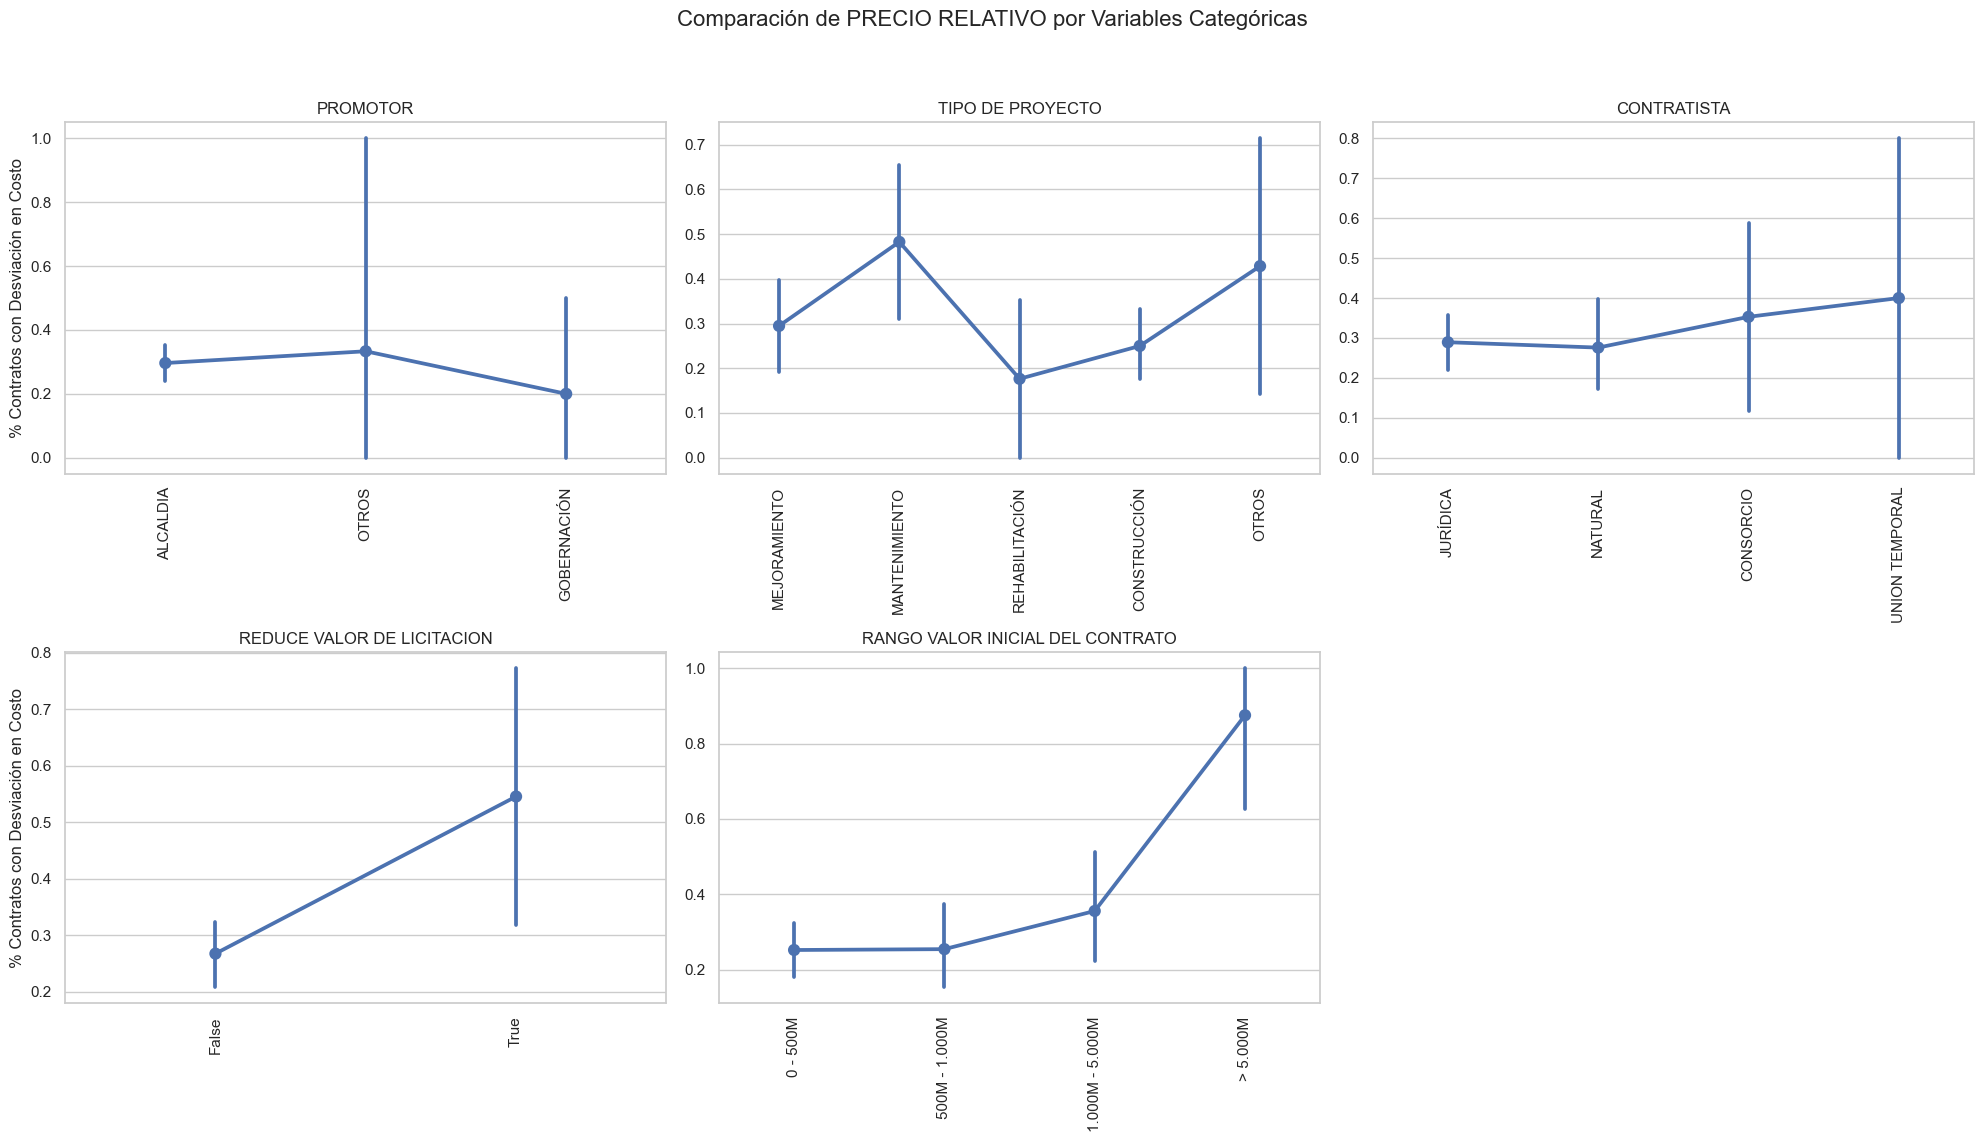

In [215]:
# Gráfica de intervalos
# Asumiendo que df es tu DataFrame y cat_cols son tus variables categóricas de interés
cat_cols = ['PROMOTOR', 'TIPO DE PROYECTO', 'CONTRATISTA', 'REDUCE VALOR DE LICITACION', 'RANGO VALOR INICIAL DEL CONTRATO']
y_var = 'DESVIACION EN COSTO'

# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Calcular cuántas filas necesitamos
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Esto asegurará que tengamos suficientes filas

# Crear una figura y un conjunto de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6), sharey=False)

# Título general para la figura
fig.suptitle('Comparación de PRECIO RELATIVO por Variables Categóricas', fontsize=16)

# Aplanar la matriz de ejes para poder iterarla más fácilmente
axes_flat = axes.flatten()

# Iterar sobre las variables categóricas y sus ejes correspondientes
for i, cat_col in enumerate(cat_cols):
    sns.pointplot(x=cat_col, y=y_var, data=df, ax=axes_flat[i])
    axes_flat[i].set_title(cat_col)
    axes_flat[i].set_xlabel('')
    axes_flat[i].set_ylabel('')
    axes_flat[i].tick_params(axis='x', rotation=90)

# Si hay más subgráficos que variables categóricas, escondemos los subgráficos adicionales
for j in range(i+1, n_cols * n_rows):
    axes_flat[j].set_visible(False)

# Establecer la etiqueta del eje Y solo para la primera columna de gráficos para evitar repetición
for i in range(0, n_cols * n_rows, n_cols):
    axes_flat[i].set_ylabel('% Contratos con Desviación en Costo')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el layout para dejar espacio para el título general
plt.show()

In [218]:
crosstab = pd.crosstab(df['RANGO VALOR INICIAL DEL CONTRATO'], df['DESVIACION EN COSTO'])
crosstab

DESVIACION EN COSTO,False,True
RANGO VALOR INICIAL DEL CONTRATO,,
0 - 500M,95,32
500M - 1.000M,44,15
1.000M - 5.000M,29,16
> 5.000M,1,7


In [219]:
# Realizar la prueba Chi-cuadrado y obtener el p-valor
chi2, p, dof, ex = stats.chi2_contingency(crosstab)
chi2, p, dof, ex

(15.394897927681065,
 0.0015084681854581766,
 3,
 array([[89.80334728, 37.19665272],
        [41.71966527, 17.28033473],
        [31.82008368, 13.17991632],
        [ 5.65690377,  2.34309623]]))

#### Precio Relativo

In [123]:
# Calcular el precio relativo
df['PRECIO RELATIVO'] = df['VALOR FINAL DEL CONTRATO']/df['VALOR INICIAL DEL CONTRATO']

In [124]:
# Resumen estadístico del precio relativo
df['PRECIO RELATIVO'].describe()

count    239.000000
mean       1.072367
std        0.145196
min        1.000000
25%        1.000000
50%        1.000000
75%        1.055960
max        1.540355
Name: PRECIO RELATIVO, dtype: float64

In [185]:
#Resumen estadístico
# Asumiendo que df es tu DataFrame
cat_cols = ['PROMOTOR', 'TIPO DE PROYECTO', 'CONTRATISTA', 'REDUCE VALOR DE LICITACION','RANGO VALOR INICIAL DEL CONTRATO']
y_var = 'PRECIO RELATIVO'
resumen = pd.DataFrame()

# Función para calcular el intervalo de confianza del 95%
def confianza_intervalo(mean, std, n):
    ci = 1.96 * (std / np.sqrt(n))
    return ci

# Inicializar la lista para guardar los p-valores de Kruskal-Wallis
p_valores = []

for cat in cat_cols:
    # Agrupar por cat, calcular tamaño, media y confianza intervalo, renombrar las columnas
    temp = (
        df
        .groupby([cat])[y_var]
        .agg(['size', 'mean', 'std'])
        .rename(columns={'size': 'Total Contratos', 'mean': 'Precio Relativo Promedio', 'std':'Desv. Estandar'})
    )
    
    # Ordenar solo variables categóricas nominales
    if cat in ['PROMOTOR', 'TIPO DE PROYECTO', 'CONTRATISTA', 'REDUCE VALOR DE LICITACION']:
       temp =  temp.sort_values(by='Total Contratos', ascending=False)
    
    temp['Variable Categorica'] = cat
    temp['CI 95% Inferior'] = temp.apply(lambda row: row['Precio Relativo Promedio'] - confianza_intervalo(row['Precio Relativo Promedio'], row['Desv. Estandar'], row['Total Contratos']), axis=1)
    temp['CI 95% Superior'] = temp.apply(lambda row: row['Precio Relativo Promedio'] + confianza_intervalo(row['Precio Relativo Promedio'], row['Desv. Estandar'], row['Total Contratos']), axis=1)

    
    # Realizar la prueba de Kruskal-Wallis y obtener el p-valor
    grupos = [grupo[y_var].values for nombre, grupo in df.groupby(cat)]
    kruskal_test = stats.kruskal(*grupos)
    temp['p-value (kw)'] = kruskal_test.pvalue
    p_valores.append(kruskal_test.pvalue)

    
    # Reiniciar el índice para convertir el índice en una columna y facilitar la concatenación
    #temp = temp.reset_index()
    # Concatenar el DataFrame temporal con el resumen
    resumen = pd.concat([resumen, temp])

# Agregar la columna de p-valores al DataFrame resumen
#resumen['p-valor'] = p_valores
resumen['Categorias'] = resumen.index
resumen = resumen.set_index(['Variable Categorica','p-value (kw)','Categorias'])
resumen

Total Contratos  \
Variable Categorica              p-value (kw) Categorias                         
PROMOTOR                         0.763620     ALCALDIA                     226   
                                              GOBERNACIÓN                   10   
                                              OTROS                          3   
TIPO DE PROYECTO                 0.080655     CONSTRUCCIÓN                 108   
                                              MEJORAMIENTO                  78   
                                              MANTENIMIENTO                 29   
                                              REHABILITACIÓN                17   
                                              OTROS                          7   
CONTRATISTA                      0.929809     JURÍDICA                     159   
                                              NATURAL                       58   
                                              CONSORCIO                     17   
                                              UNION TEMPORAL                 5   
REDUCE VALOR DE LICITACION       0.020424     False                        217   
                                              True                          22   
RANGO VALOR INICIAL DEL CONTRATO 0.000020     0 - 500M                     127   
                                              500M - 1.000M                 59   
                                              1.000M - 5.000M               45   
                                              > 5.000M                       8   

                                                               Precio Relativo Promedio  \
Variable Categorica              p-value (kw) Categorias                                  
PROMOTOR                         0.763620     ALCALDIA                         1.072047   
                                              GOBERNACIÓN                      1.053941   
                                              OTROS                            1.157866   
TIPO DE PROYECTO                 0.080655     CONSTRUCCIÓN                     1.065054   
                                              MEJORAMIENTO                     1.064240   
                                              MANTENIMIENTO                    1.134385   
                                              REHABILITACIÓN                   1.037497   
                                              OTROS                            1.103507   
CONTRATISTA                      0.929809     JURÍDICA                         1.079241   
                                              NATURAL                          1.057010   
                                              CONSORCIO                        1.058758   
                                              UNION TEMPORAL                   1.078200   
REDUCE VALOR DE LICITACION       0.020424     False                            1.069328   
                                              True                             1.102345   
RANGO VALOR INICIAL DEL CONTRATO 0.000020     0 - 500M                         1.052890   
                                              500M - 1.000M                    1.046079   
                                              1.000M - 5.000M                  1.107835   
                                              > 5.000M                         1.375935   

                                                               Desv. Estandar  \
Variable Categorica              p-value (kw) Categorias                        
PROMOTOR                         0.763620     ALCALDIA               0.143311   
                                              GOBERNACIÓN            0.156893   
                                              OTROS                  0.273431   
TIPO DE PROYECTO                 0.080655     CONSTRUCCIÓN           0.142695   
                                              MEJORAMIENTO           0.131549   
                                  

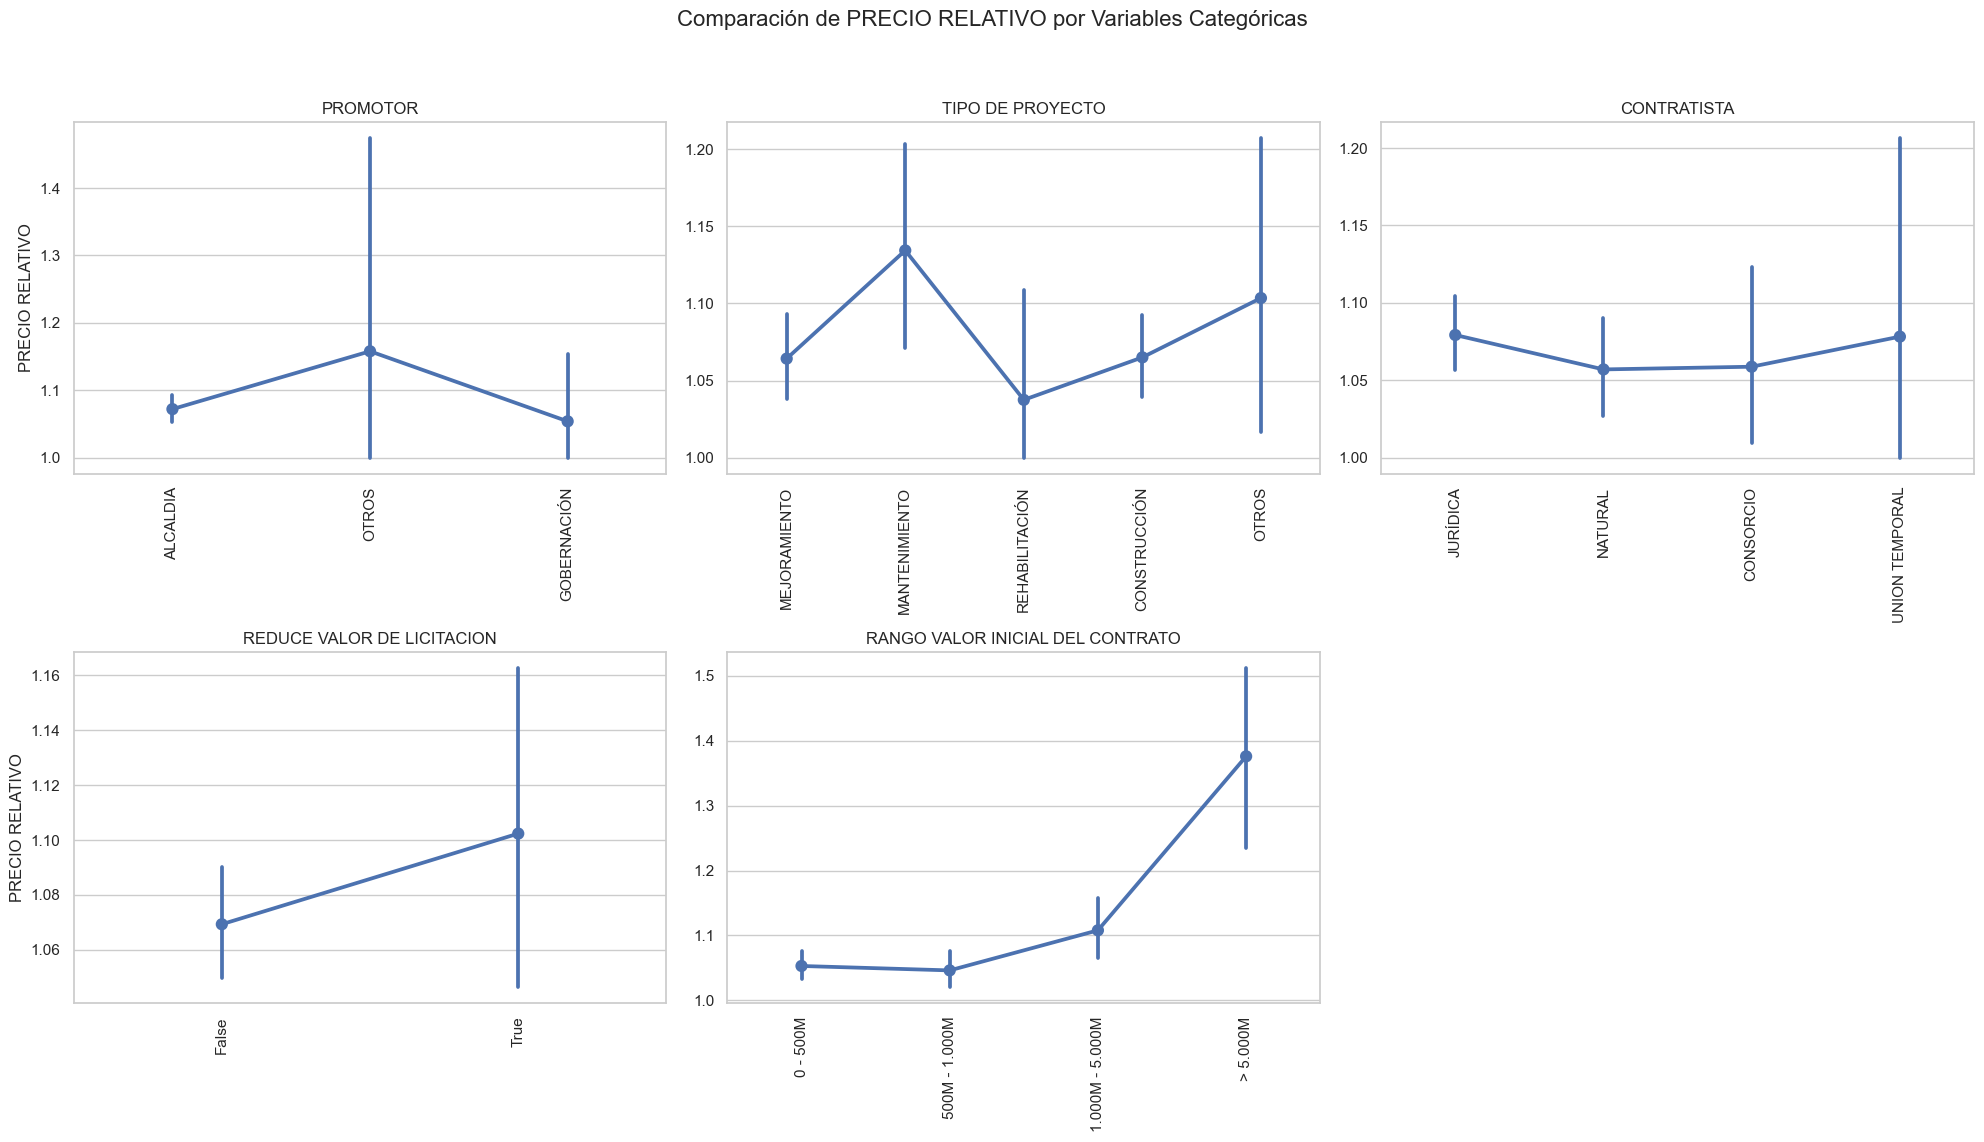

In [182]:
# Asumiendo que df es tu DataFrame y cat_cols son tus variables categóricas de interés
cat_cols = ['PROMOTOR', 'TIPO DE PROYECTO', 'CONTRATISTA', 'REDUCE VALOR DE LICITACION', 'RANGO VALOR INICIAL DEL CONTRATO']
y_var = 'PRECIO RELATIVO'

# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Calcular cuántas filas necesitamos
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # Esto asegurará que tengamos suficientes filas

# Crear una figura y un conjunto de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6), sharey=False)

# Título general para la figura
fig.suptitle('Comparación de PRECIO RELATIVO por Variables Categóricas', fontsize=16)

# Aplanar la matriz de ejes para poder iterarla más fácilmente
axes_flat = axes.flatten()

# Iterar sobre las variables categóricas y sus ejes correspondientes
for i, cat_col in enumerate(cat_cols):
    sns.pointplot(x=cat_col, y=y_var, data=df, ax=axes_flat[i])
    axes_flat[i].set_title(cat_col)
    axes_flat[i].set_xlabel('')
    axes_flat[i].set_ylabel('')
    axes_flat[i].tick_params(axis='x', rotation=90)

# Si hay más subgráficos que variables categóricas, escondemos los subgráficos adicionales
for j in range(i+1, n_cols * n_rows):
    axes_flat[j].set_visible(False)

# Establecer la etiqueta del eje Y solo para la primera columna de gráficos para evitar repetición
for i in range(0, n_cols * n_rows, n_cols):
    axes_flat[i].set_ylabel(y_var)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar el layout para dejar espacio para el título general
plt.show()


In [129]:
df.columns

Index(['ITEM', 'LINK', 'AÑO DE FIRMA DEL CONTRATO', 'PROMOTOR',
       'TIPO DE PROYECTO', 'REGION DE COLOMBIA', 'CONTRATISTA',
       'TIPO DE DESVIACIÓN', 'CAUSA: AUMENTO DE CANTIDADES Y ACTIVIDADES',
       'CAUSA: CLIMA', 'CAUSA: AJUSTE A DISEÑOS ORIGINALES',
       'CAUSA: ESCAZES DE MATERIALES',
       'CAUSA: AUMENTO EN LOS COSTOS DE LOS MATERIALES',
       'CAUSA: FALTA DE HERRAMIENTAS', 'CAUSA: FALTAS DE EQUIPOS',
       'CAUSA: FALTA DE MANO DE OBRA', 'CAUSA: CONFLICTOS SOCIALES',
       'CAUSA: ASPECTOS TECNICOS CONSTRUCTIVOS',
       'CAUSA: TOPOGRAFIA DESFAVORABLE', 'VALOR INICIAL DEL CONTRATO',
       'VALOR INICIAL DEL CONTRATO ( SMMLV)',
       'PLAZO INICIAL DEL CONTRATO (MESES)', 'VALOR FINAL DEL CONTRATO',
       'PLAZO FINAL DEL CONTRATO', 'VALOR ADICION', 'PRORROGA (MESES)',
       'VALOR DE LICITACIÓN', 'PORCENTAJE DE BAJA',
       'NUMERO DE PARTICIPANTES EN PROCESO', 'FECHA DE APERTURA',
       'FECHA DE PLIEGOS DEFINITIVOS', 'FECHA DE CIERRE Y PARTICIPACION',
 